# IDEA:

Now we want to obtain 5 df, one for each user that we obtain from the cluster analysis 

this is the first step for build our NN, since we want to train the model with the song that each single User listen, and we want to predict the 'valence' (that is a evaluation of how much the song is liked to the user) based on the teste of the single user

## Df

In [54]:
# we recall our df after the clustering procedure
%store -r merge_unique_df

FIRST IMPLEMENTATION 

In [55]:
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [56]:
# i want to rename the column Cluster --> WILL BE OUR USER 
merge_unique_df.rename(columns={'cluster':'User'},inplace=True)
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [57]:
# to see wich feature consider in the model 
merge_unique_df.columns

Index(['Performer', 'Song', 'spotify_genre', 'spotify_track_duration_minute',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity', 'maingenere', 'User'],
      dtype='object')

In [58]:
merge_unique_df.shape

(27207, 21)

In [59]:
# to verify that we don't have Nan value after the marge
merge_unique_df.isnull().sum()

Performer                        0
Song                             0
spotify_genre                    0
spotify_track_duration_minute    0
spotify_track_explicit           0
spotify_track_album              0
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
time_signature                   0
spotify_track_popularity         0
maingenere                       0
User                             0
dtype: int64

## PACKAGES

In [60]:
# package that we need
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import pandas as pd


# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score,f1_score


# essential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#correlation
import seaborn as sns


#RICORDARE DA INSTALLARE PEDROLLO 
#! pip install pydot

## Now we can try to develop our (first) NN

In [61]:
# fisrt we define the FEATURE of our model --> INPUT
feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
target='valence'

# we also define the USER, since we train the model dividing by users
user='User'

In [62]:
len(feature)

13

### USER 1 - Test


In [63]:
# first we have to obtain only the songs listen to the USER1
mask_user1=merge_unique_df['User']==1
user1_df=merge_unique_df[mask_user1]
user1_df.shape

(4669, 21)

In [64]:
user1_df.User.unique()

array([1])

In [65]:
# we obtain the user1 subset
user1_df.head(3)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",3.66,False,Radio Hits Of the '80s,0.647,0.686,2.0,-4.247,...,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,rock,1
'til I Can Make It On My OwnTammy Wynette,Tammy Wynette,'til I Can Make It On My Own,"['country', 'country dawn', 'nashville sound']",3.03,False,The Essential Tammy Wynette,0.450,0.294,7.0,-12.022,...,0.0318,0.8320,0.000035,0.1080,0.146,141.148,4.0,31.0,country,1
'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,"['funk', 'motown', 'neo soul', 'new jack swing...",5.54,False,The Night I Fell In Love,0.804,0.714,11.0,-6.714,...,0.1830,0.0567,0.000006,0.0253,0.802,139.663,4.0,29.0,soul,1


In [66]:
#E SE TRASFORMASSIMO IL MAINGENERE IN UN NUMERO????? POTREBBE ESSERE UTILE PER CONSIGLIARE LE CANZONI?? (magari in un mese ascolta solo un genere quindi meglio consigliargli un genere simile)
print(user1_df['maingenere'].value_counts()) #check song recensite
mean_valence_maingenere = user1_df.groupby('maingenere')['valence'].mean() #check the mean for maingenere (the averege rank that the usere give to some type of songs)
display(mean_valence_maingenere)

maingenere
pop        1256
rock       1108
country     521
rap         520
other       483
soul        308
metal        69
disco        66
dance        65
folk         50
blues        48
jazz         43
funk         40
house        31
indie        24
r&b          23
latin        14
Name: count, dtype: int64


maingenere
blues      0.825375
country    0.496266
dance      0.601092
disco      0.648318
folk       0.602440
funk       0.601755
house      0.552652
indie      0.682583
jazz       0.603488
latin      0.709857
metal      0.374229
other      0.664371
pop        0.595602
r&b        0.533957
rap        0.460987
rock       0.631969
soul       0.655705
Name: valence, dtype: float64

Note:
in order to understand the property of our cluster, we check for wich is the mean vote for each maingenre:

we see that the user like a lot blues and don't like metal, this generes can be use to test the model 

(check if the model propose the song with this main genere)

In [67]:
#VALUE FOR TEST SPLIT ONLY ON VALUES (we don't know the name song)

# now we estract the FEATURE
x=user1_df[feature]
# and the TARGET
y=user1_df[target]

#VALUES FOR TEST SPLIT ON THE INDEX

#name song
name_song = x.index
#aaaa = pd.Series(name_song)
display(name_song)
#test
arr = (name_song == y.index)
display(arr.shape)
display(pd.Series(arr).value_counts())

Index([''65 Love AffairPaul Davis',
       ''til I Can Make It On My OwnTammy Wynette',
       ''Til My Baby Comes HomeLuther Vandross',
       ''Tis The Damn SeasonTaylor Swift',
       '('til) I Kissed YouThe Everly Brothers',
       '(Closest Thing To) PerfectJermaine Jackson',
       '(Dance The) Mess AroundChubby Checker',
       '(Do You) Wanna RideReel Tight',
       '(Don't Fear) The ReaperBlue Oyster Cult',
       '(I Can't Get No) SatisfactionThe Rolling Stones',
       ...
       'YouRomeo Santos', 'YoursRussell Dickerson', 'YoursShai',
       'Yuck!2 Chainz Featuring Lil Wayne', 'YuckLogic',
       'Yummy Yummy YummyOhio Express', 'YummyJustin Bieber',
       'Zack And CodeinePost Malone', 'Zip CodeThe Five Americans',
       'ZoomFuture'],
      dtype='object', name='SongID', length=4669)

(4669,)

True    4669
Name: count, dtype: int64

### DATA FRAME INDEX NAME SONG SCALED 

In [68]:
# NORMALIZE OUR FEATURES FOR NOT INDEX APPROACH
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#display(x_scaled)
x_final_scaled = pd.DataFrame(index = name_song, columns = x.columns, data = x_scaled)
#display(x_final_scaled)

### SPLIT DF SCALED (ON NAME SONGS)

In [69]:
# now we divide the df in test and train 
# necessary in order test our results after the application of the model

#--------------------------

#TEST SPLIT ONLY ON VALUES
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

#--------------------------

#TEST SPLIT ON THE INDEX
train_index, test_index = train_test_split(name_song, test_size=0.2, random_state=42)

x_train, x_test = x_final_scaled.loc[train_index], x_final_scaled.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

#print('x_train:', x_train.index)
#print('y_train:', y_train.index)

display(x_train)
display(y_train)


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
Takin' It To The StreetsTaylor Hicks,-0.023439,0.330952,1.010340,-1.464765,0.451290,0.567375,-0.174850,-0.492930,0.411121,0.194283,-1.534565,-0.230799,-0.725615
Take It AwayPaul McCartney,0.595882,0.030827,-0.042782,-0.899886,-0.181890,0.567375,-0.432766,-0.994019,-0.992059,0.194283,-0.326186,-0.230429,-0.752664
Around The World (La La La La La)ATC,-0.385504,0.745410,1.668542,1.077190,0.175475,-1.762504,-0.533910,-0.243983,-1.391985,0.194283,-1.087017,-0.229640,4.451207
Prom QueenLil Wayne Featuring Shanell AKA SNL,-0.023439,-0.490818,1.184106,0.512311,1.039035,0.567375,-0.029457,-1.024137,0.278455,0.194283,-0.012902,-0.230610,-0.067216
Ridin' The Storm OutREO Speedwagon,0.529186,-0.147819,0.831310,1.077190,0.724192,-1.762504,-0.547817,-0.965557,-1.002243,0.194283,0.300381,-0.230603,2.145889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whiskey In My WaterTyler Farr,-0.480785,-0.369339,1.220965,0.512311,0.946708,0.567375,-0.356909,-0.113937,1.630165,0.194283,0.613665,-0.230799,0.277045
BodyDreezy Featuring Jeremih,0.224289,1.124139,-0.385047,-1.464765,0.689533,0.567375,-0.095200,1.026759,1.085050,0.194283,0.882194,-0.230799,-0.811680
Read Your MindAvant,0.710218,1.231326,-1.311795,0.794750,0.361876,-1.762504,0.152602,0.004963,0.565256,0.194283,0.703174,-0.230755,-0.750205


SongID
Takin' It To The StreetsTaylor Hicks             0.783
Take It AwayPaul McCartney                       0.928
Around The World (La La La La La)ATC             0.539
Prom QueenLil Wayne Featuring Shanell AKA SNL    0.442
Ridin' The Storm OutREO Speedwagon               0.609
                                                 ...  
Whiskey In My WaterTyler Farr                    0.583
BodyDreezy Featuring Jeremih                     0.574
Read Your MindAvant                              0.711
Thank You GirlStreet People                      0.944
Dirty LooksJuice Newton                          0.591
Name: valence, Length: 3735, dtype: float64

In [70]:
# for keras we need to convert y_train and y_test in Numpy array 
'''y_train=np.array(y_train)
y_test=np.array(y_test)

#before apply the model we need to verify the shape of this array

x_train.shape,x_test.shape,y_train.shape,y_test.shape'''

'y_train=np.array(y_train)\ny_test=np.array(y_test)\n\n#before apply the model we need to verify the shape of this array\n\nx_train.shape,x_test.shape,y_train.shape,y_test.shape'

In [71]:
#x_train.shape[1]

In [72]:
# are 13 as the number of input that we have to insert in the input_dim --> only in the first layer
x.columns

Index(['spotify_track_duration_minute', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'tempo',
       'time_signature', 'spotify_track_popularity', 'instrumentalness',
       'liveness'],
      dtype='object')

In [73]:
# NOW WE CAN TRY TO APPLY OUR NN (LINEAR)
model_user1=Sequential([
    Dense(32,input_dim=x_train.shape[1],activation='relu',name='first_layer',kernel_regularizer=l2(0.01)),
    # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
    # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
    
    # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
    Dropout(0.3),
    Dense(16,activation='relu',name='secod_layer',kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    #Dense(1,activation='linear',name='final_layer')
    Dense(1,activation='sigmoid',name='final_layer') #ATENZION PROVIAMO SIGMOID PRCHè CI SERVE UN OUTPUT NEL RANGE DI O E 1 
])

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Now we try to compile the model
model_user1.compile(optimizer='adam',loss='mse',metrics=['mae']) #CAN WE PUT ALSO ACCURACY IN METRICS?

#now see some results
model_user1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Now we can train our model
history_model_user1=model_user1.fit(
    x_train,y_train,
    #validation_split=0.2,
    #x_train.columns(),y_train.columns(),
    validation_data = [x_test, y_test], #da problemi
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4461 - mae: 0.2672 - val_loss: 0.2372 - val_mae: 0.2052
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2070 - mae: 0.2115 - val_loss: 0.1251 - val_mae: 0.1984
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1126 - mae: 0.2012 - val_loss: 0.0774 - val_mae: 0.1844
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0717 - mae: 0.1823 - val_loss: 0.0559 - val_mae: 0.1660
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0553 - mae: 0.1683 - val_loss: 0.0476 - val_mae: 0.1576
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0500 - mae: 0.1648 - val_loss: 0.0448 - val_mae: 0.1545
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0465 - mae: 0.1582 - val_loss: 0.0429 - val_mae: 0.1511
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0465 - mae: 0.1608 - val_loss: 0.0424 - val_mae: 0.1511
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

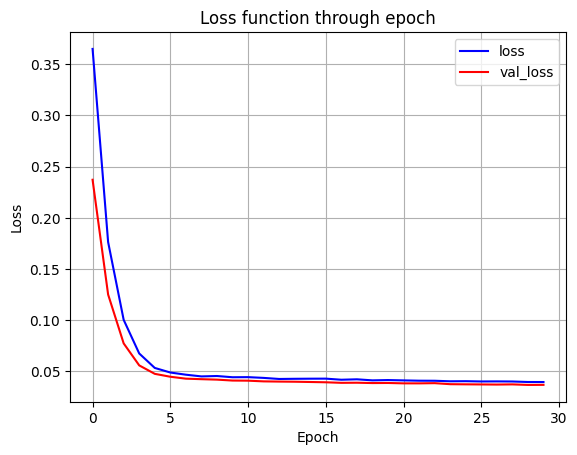

In [76]:
# we can try to perform some plots
plt.figure()
plt.plot(history_model_user1.history['loss'],color='blue',label='loss')
plt.plot(history_model_user1.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

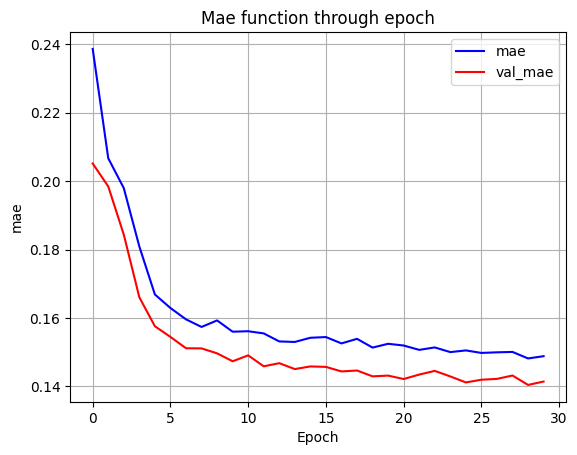

In [77]:
plt.figure()
plt.plot(history_model_user1.history['mae'],color='blue',label='mae')
plt.plot(history_model_user1.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()

In [78]:
print(history_model_user1.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [79]:
# keras.utils.plot_model( model, show_shapes=True)
#keras.utils.plot_model(model_user1,show_shapes=True)

# non mi plotta nulla --> da rivedere perchè non avevo pacchetto installato 

In [80]:
# now we can evaluate the test data

test_loss, test_mae = model_user1.evaluate(x_test,y_test,verbose=1)

test_loss,test_mae

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360 - mae: 0.1398 


(0.036866169422864914, 0.14140808582305908)

Now we have to try to predict the possible valence (y_hat)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
One Night AffairThe O'Jays,0.876,0.729766,True,True
Young & Gettin' ItMeek Mill Featuring Kirko Bangz,0.858,0.577958,True,False
Everything Is Good About YouThe Lettermen,0.804,0.727053,True,True
Hot Fun In The SummertimeSly & The Family Stone,0.931,0.789107,True,True
Will The Wolf SurviveLos Lobos,0.844,0.735763,True,True
...,...,...,...,...
HeavenBryan Adams,0.335,0.323506,False,False
I Have NothingWhitney Houston,0.240,0.348790,False,False
Only You Can Love Me This WayKeith Urban,0.325,0.410173,False,False


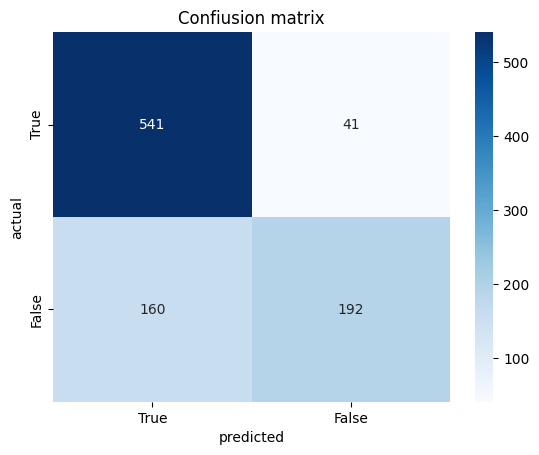

In [81]:
yhat = model_user1.predict(x_test)

#display(yhat.flatten().shape)
#display(y_test.shape)
#display(yhat.tolist())

#display(yhat)
#display(y_test)

data = {'Original Test': y_test,
        'Prediction Test': yhat.flatten(),
        }
df_prediction = pd.DataFrame(data = data)
df_prediction['Original over Thrashold'] = df_prediction['Original Test'] > 0.7
df_prediction['Predicted over Thrashold'] = df_prediction['Prediction Test'] > 0.7

display(df_prediction)

cm_bal = confusion_matrix(df_prediction['Original over Thrashold'], df_prediction['Predicted over Thrashold'])

plt.figure()
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.title('Confiusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
#display(data)

#plt.figure(figsize=(12,6))
#plt.scatter(y = y_test, x = range (0, len(y_test)),color='r')
#plt.scatter(y = yhat, x = range (0, len(y_test)), color='b') #attenzione alcune predizione sono negative
#plt.title('Prediction')
#plt.legend()
#plt.show()

#plt.figure(figsize=(12,6))
#sns.barplot(df_prediction['Prediction Test'].round(2), color = 'Green', label='Prediction Test')
#sns.barplot(df_prediction['Original Test'].round(2), color = 'Red', label = 'Original Test')
#plt.xlabel('Valence')
#plt.ylabel('Density')
#plt.legend()
#plt.show()

In [82]:
'''x_test_name_song = user1_df.iloc[np.arange(len(yhat))].index # ATTENZIONE I NOMI SONO TUTTI SBAGLAITI
#PERCHè USO TEST_SPLIT FUNCTION CON RANDOM QUINDI NON è RISALIBILE ALLA CANZONE ORIGINALE!!!!!!!!!!!!!!!!!!
print('X_TEST_NAME_SONG')
display(x_test_name_song)
print('X_test')
display(x_test)
# Threshold for raccommendations --> valence > 0.7

#reccomended_songs=user_i_df.loc[x_test_indices][y_hat.flatten()>0.7] # filtet songs with valence > 0.7
#reccomended_songs = user_i_df.loc[x_test_name_song][y_hat.flatten()>0.7] # filtet songs with valence > 0.7
#display(reccomended_songs)    

#Dataframe_prova = pd.DataFrame(columns=[])
#Dataframe_prova = pd.DataFrame()

reccomended_songs = {
    #'Song':x_test_name_song,
    'Song':x_test.index,
    'Original Test': y_test,
    'Prediction Test':yhat.flatten()
}
Dataframe_prova = pd.DataFrame(reccomended_songs)  #ATTENZINE LA PREDIZIONE DEVE AVERE UN VALORE COMPRESO TRA 0 E 1!!!!!!!!!!!!!!!!!!!!!

Dataframe_prova['Original over Thrashold'] = Dataframe_prova['Original Test'] > 0.7
Dataframe_prova['Predicted over Thrashold'] = Dataframe_prova['Prediction Test'] > 0.7

display(Dataframe_prova)

cm_bal = confusion_matrix(Dataframe_prova['Original over Thrashold'], Dataframe_prova['Predicted over Thrashold'])

plt.figure()
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.title('Confiusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()'''

"x_test_name_song = user1_df.iloc[np.arange(len(yhat))].index # ATTENZIONE I NOMI SONO TUTTI SBAGLAITI\n#PERCHè USO TEST_SPLIT FUNCTION CON RANDOM QUINDI NON è RISALIBILE ALLA CANZONE ORIGINALE!!!!!!!!!!!!!!!!!!\nprint('X_TEST_NAME_SONG')\ndisplay(x_test_name_song)\nprint('X_test')\ndisplay(x_test)\n# Threshold for raccommendations --> valence > 0.7\n\n#reccomended_songs=user_i_df.loc[x_test_indices][y_hat.flatten()>0.7] # filtet songs with valence > 0.7\n#reccomended_songs = user_i_df.loc[x_test_name_song][y_hat.flatten()>0.7] # filtet songs with valence > 0.7\n#display(reccomended_songs)    \n\n#Dataframe_prova = pd.DataFrame(columns=[])\n#Dataframe_prova = pd.DataFrame()\n\nreccomended_songs = {\n    #'Song':x_test_name_song,\n    'Song':x_test.index,\n    'Original Test': y_test,\n    'Prediction Test':yhat.flatten()\n}\nDataframe_prova = pd.DataFrame(reccomended_songs)  #ATTENZINE LA PREDIZIONE DEVE AVERE UN VALORE COMPRESO TRA 0 E 1!!!!!!!!!!!!!!!!!!!!!\n\nDataframe_prova['Origin

### END OF OUR TEST

What we notice:

1) Important to check for the correlation, in order to understand if all the features that we consider for the NN beside are relevant 

2) Mybe the numbers of the intial neurons are to high since we see that the loss and the mae after only five epoch are almost constant 

3) We want to automatize the process, in order to avoid to define each df for each user and appy for each a diffrent model

---

# UPDATE 

1) Check for the correlation 

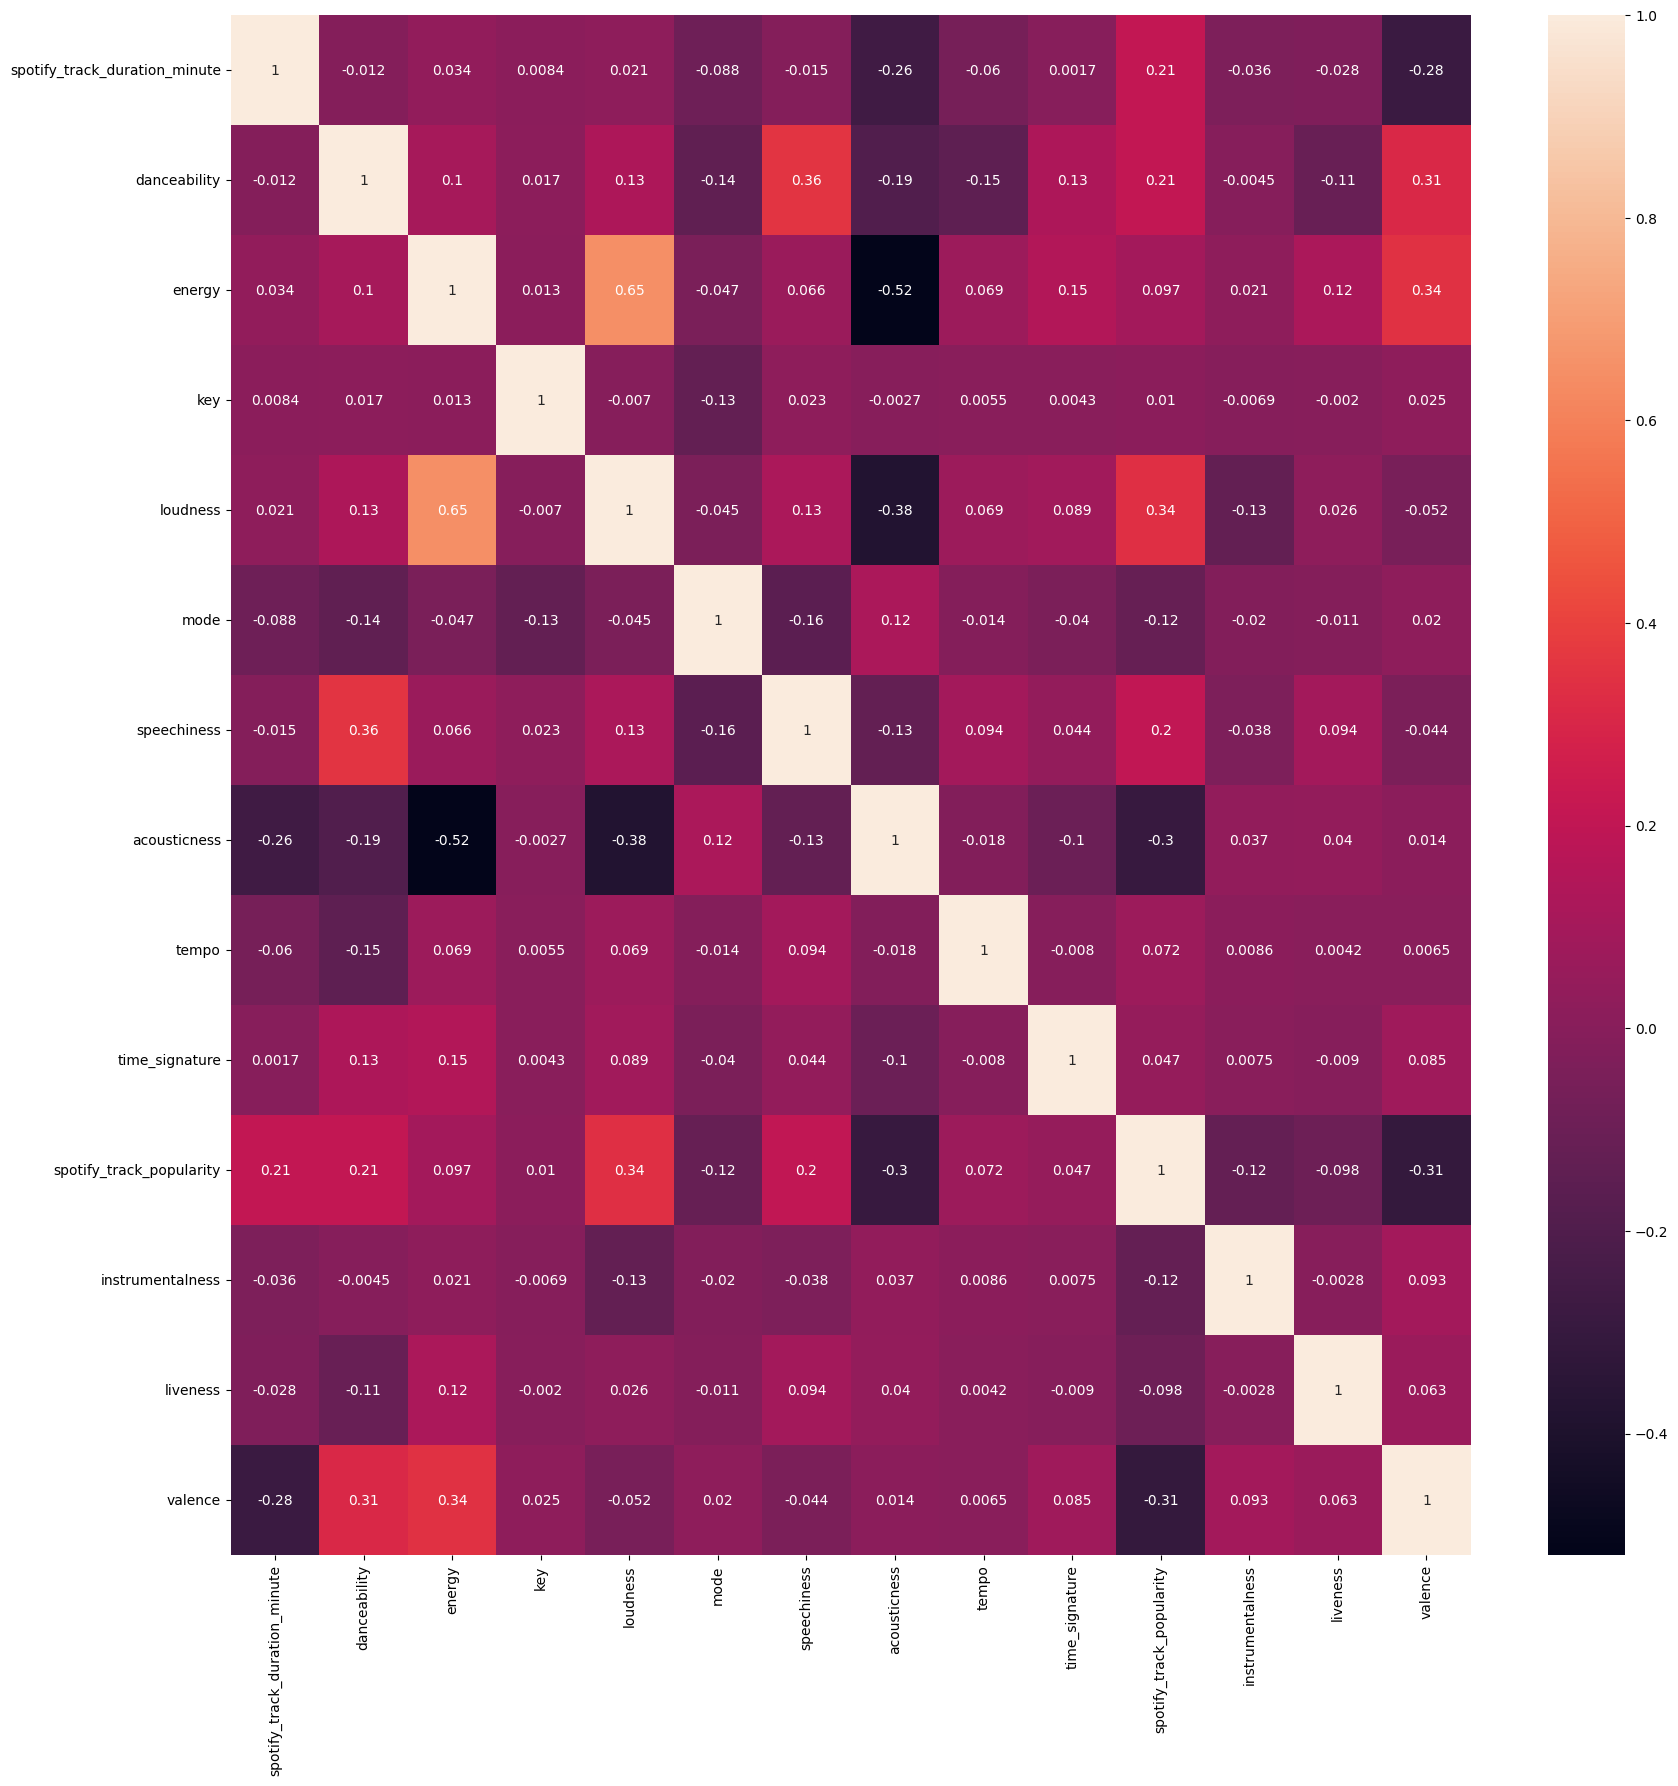

In [83]:
#i want to check possible correlation
plt.figure(figsize=(20,20))
sns.heatmap(user1_df[['spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness', 'valence']].corr(), annot= True)
plt.show()

We can notice that:

-   key is a useless 
-   tempo is a useless 
-   time signature is a useless 
-   spotify track popularity, we can se that is negative correlated with valence; it is positive correlated with loudness (BOTH INTERESTING)

So we can delite what are not usfull for our analysis

We redefine the list of feature delating the one that are useless 

We convert the maingenere in a integer value, we understand that use it as a numerical values does not add info to our NN.
For this reason later we develop the One Hot encoding to our variable.

In [84]:
#first thing to do convert the maingenere in integer
#the idea consist to use the merge df qith value count on the maingenere and use the index
maing = merge_unique_df['maingenere'].value_counts()
dizio_main = {}
for index_maing in range(0,len(maing.index)): #value to indicate the genere
    dizio_main[maing.index[index_maing]] = index_maing
   #print(index_maing)


print(dizio_main)
#codifica dei maingeneri
merge_unique_numain_df = merge_unique_df.copy()
#rplace
merge_unique_numain_df['maingenere'].replace(dizio_main, inplace=True)
display(merge_unique_numain_df.head(3))

{'pop': 0, 'rock': 1, 'other': 2, 'soul': 3, 'rap': 4, 'country': 5, 'disco': 6, 'jazz': 7, 'blues': 8, 'funk': 9, 'dance': 10, 'metal': 11, 'folk': 12, 'house': 13, 'indie': 14, 'r&b': 15, 'latin': 16}


C:\Users\elped\AppData\Local\Temp\ipykernel_8072\1201508369.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_unique_numain_df['maingenere'].replace(dizio_main, inplace=True)
C:\Users\elped\AppData\Local\Temp\ipykernel_8072\1201508369.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mer

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.590,0.570,5.37,-9.970,...,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,2,2
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.590,0.570,5.37,-9.970,...,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,2,2
......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",2.77,False,The Essential Andy Williams,0.154,0.185,5.00,-14.063,...,0.0315,0.911,0.000267,0.112,0.15,83.969,4.00,38.00,0,3


# GENERALIZE THE PROCESS + change the n. of initial neurons (2) - (3)

### Our new feature

In [85]:
#now we remove the useless feature and add maingenere codified #attenzione abbiamo deciso alla fine di togliere main genere, verrà rinserito come one-hot-encoding
new_feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
new_target='valence'

IDEA:

make a loop for create the 5 df, one for each user + NN model for each df

In [86]:
merge_unique_numain_df['User'].unique()

array([2, 3, 0, 4, 1])

## PLOT

interesting plots for visualize the output of our model

In [87]:
def plot_for_model(history):

    #plot loss
    plt.figure()
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure()
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

    # plot  #RIVEDERE
    # aggiunto A.L
    #plt.figure(figsize=(12,6))
    #plt.plot(y_test, color='r')
    #plt.plot(y_hat, color='b') #attenzione alcune predizione sono negative
    #plt.title('Prediction')
    #plt.legend()
    #plt.show()

## SPLIT DATA

In [88]:
def return_train_test(df):

    #df on feature
    x = df[new_feature]
    y = df[new_target]
    
    #split on the index (name song)

    #name song
    name_song = df.index
    #display(name_song)
    
    #test
    #arr = (name_song == y.index)
    #display(arr.shape)
    #display(pd.Series(arr).value_counts())

    #scaled dataframe for x 
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_final_scaled = pd.DataFrame(index = name_song, columns = x.columns, data = x_scaled)

    #split df scaled
    train_index, test_index = train_test_split(name_song, test_size=0.2, random_state=42)

    x_train, x_test = x_final_scaled.loc[train_index], x_final_scaled.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    #print('x_train:', x_train.index)
    #print('y_train:', y_train.index)

    #display(x_train)
    #display(y_train)
    return x_train,y_train,x_test,y_test


## MODEL

In [89]:
# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    '''model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='sigmoid', name='final_layer')
    ])'''

    model_user_i = Sequential([
        
        Dense(32,input_dim=shape_x_train,activation='relu',name='first_layer',kernel_regularizer=l2(0.01)),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        Dropout(0.3),
        Dense(16,activation='relu',name='secod_layer',kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        #Dense(1,activation='linear',name='final_layer')
        Dense(1,activation='sigmoid',name='final_layer') 
        #ATENZION PROVIAMO SIGMOID PRCHè CI SERVE UN OUTPUT NEL RANGE DI O E 1
    
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i
    

## FIT MODEL

In [90]:
#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=20,
        batch_size=32,
        #verbose=1
    )

    return history_model

## RECOMANDATION FUNCTION + CONFUSION MATRIX

In [91]:
def reco_function_conf_matrix(y_test, y_hat, threshold):
    
    #initialize dataframe    
    data = {'Original Test': y_test,
        'Prediction Test': y_hat.flatten(),
        }
    df_prediction = pd.DataFrame(data = data)
    df_prediction['Original over Thrashold'] = df_prediction['Original Test'] > threshold
    df_prediction['Predicted over Thrashold'] = df_prediction['Prediction Test'] > threshold
    display(df_prediction)

    #plot confusion matrix of reccomandation
    cm = confusion_matrix(df_prediction['Original over Thrashold'], df_prediction['Predicted over Thrashold'])

    # METRIX FOR EVALUATE RECCOMANDATION 
    # Extract TP, TN, FP, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate metrics manually
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    '''
    accuracy = accuracy_score(df_prediction['Original over Threshold'], df_prediction['Predicted over Threshold'])
    precision = precision_score(df_prediction['Original over Threshold'], df_prediction['Predicted over Threshold'])
    recall = recall_score(df_prediction['Original over Threshold'], df_prediction['Predicted over Threshold'])
    f1 = f1_score(df_prediction['Original over Threshold'], df_prediction['Predicted over Threshold'])
    '''

    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    plt.title('Confiusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

    # Store metrics in a DataFrame
    df_metrics_cm = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Value': [accuracy, precision, recall, f1]
    })

    display(df_metrics_cm.round(2))

    '''print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 score: {f1:.2%}")'''

    return df_prediction,df_metrics_cm

## MAIN

---------------------------------------------------------
USER 0
Epoch 1/20


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3762 - mae: 0.2336 - val_loss: 0.1772 - val_mae: 0.1673
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1496 - mae: 0.1713 - val_loss: 0.0816 - val_mae: 0.1566
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0744 - mae: 0.1627 - val_loss: 0.0513 - val_mae: 0.1521
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0513 - mae: 0.1576 - val_loss: 0.0420 - val_mae: 0.1511
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0446 - mae: 0.1573 - val_loss: 0.0391 - val_mae: 0.1478
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0413 - mae: 0.1525 - val_loss: 0.0381 - val_mae: 0.1476
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0413 - mae: 0.1557 - val_loss: 0.0377 - val_mae: 0.1467
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0401 - mae: 0.1511 - val_loss: 0.0374 - val_mae: 0.1467
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0387 

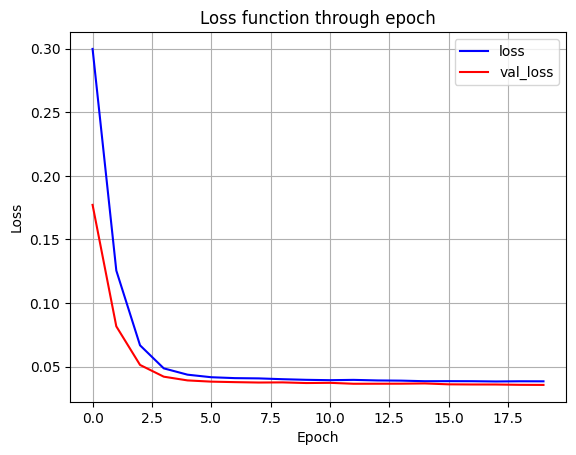

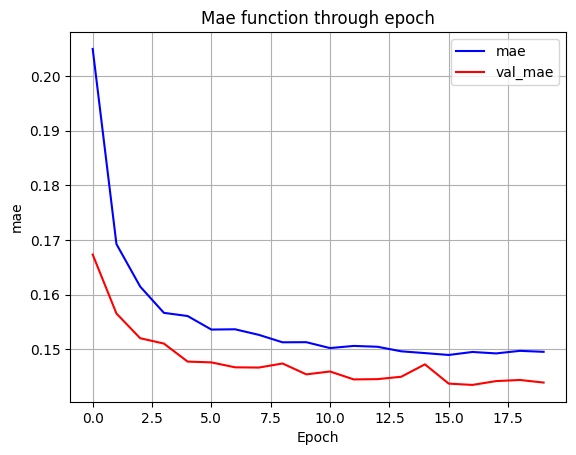

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 - mae: 0.1428
MSE:  0.03555751219391823
MAE: 0.1439463347196579


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Nice 'N' NaastyThe Salsoul Orchestra,0.883,0.733626,True,True
ShiffteeOnyx,0.253,0.709306,False,True
Since I Made You CryThe Rivieras,0.569,0.552595,False,False
TonightNew Kids On The Block,0.383,0.430262,False,False
Never Comes The DayThe Moody Blues,0.180,0.373222,False,False
...,...,...,...,...
What Am I Living ForChuck Willis,0.682,0.606700,False,False
All Summer LongHit Masters,0.863,0.713767,True,True
Hey Daddy (Daddy's Home)Usher Featuring Plies,0.352,0.543013,False,False


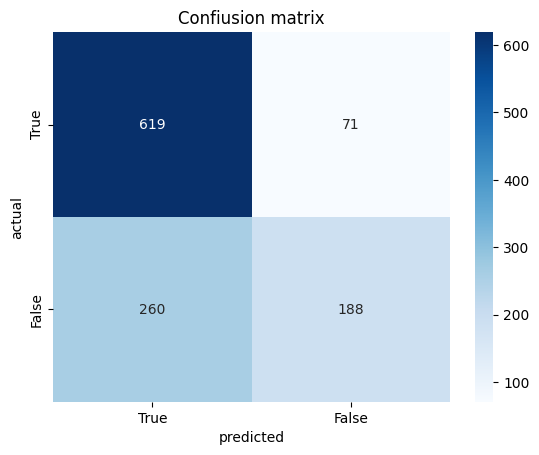

,Metric,Value
0,Accuracy,0.71
1,Precision,0.73
2,Recall,0.42
3,F1-score,0.53


---------------------------------------------------------
USER 1
Epoch 1/20


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3785 - mae: 0.2419 - val_loss: 0.2072 - val_mae: 0.1871
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1799 - mae: 0.1877 - val_loss: 0.1081 - val_mae: 0.1686
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0974 - mae: 0.1704 - val_loss: 0.0658 - val_mae: 0.1563
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0636 - mae: 0.1634 - val_loss: 0.0501 - val_mae: 0.1518
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520 - mae: 0.1602 - val_loss: 0.0438 - val_mae: 0.1484
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0460 - mae: 0.1566 - val_loss: 0.0421 - val_mae: 0.1486
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0441 - mae: 0.1531 - val_loss: 0.0413 - val_mae: 0.1496
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427 - mae: 0.1532 - val_loss: 0.0402 - val_mae: 0.1465
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0420 

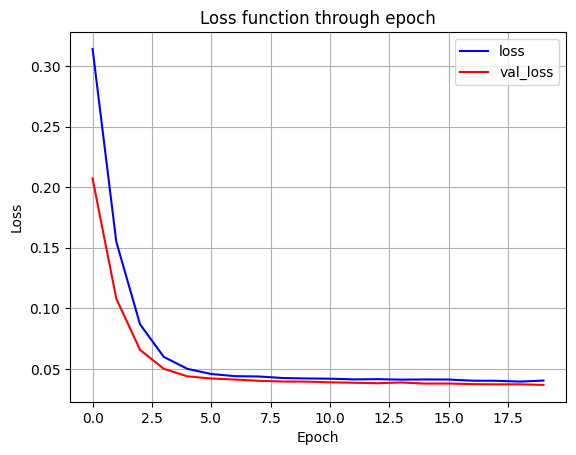

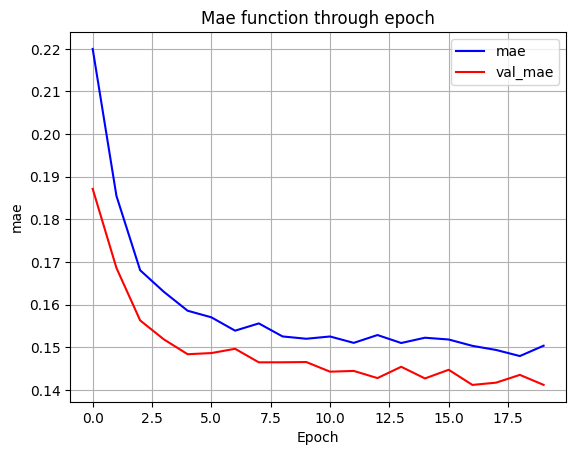

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0359 - mae: 0.1392
MSE:  0.036795735359191895
MAE: 0.1411609649658203


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
One Night AffairThe O'Jays,0.876,0.764598,True,True
Young & Gettin' ItMeek Mill Featuring Kirko Bangz,0.858,0.612924,True,False
Everything Is Good About YouThe Lettermen,0.804,0.730187,True,True
Hot Fun In The SummertimeSly & The Family Stone,0.931,0.791687,True,True
Will The Wolf SurviveLos Lobos,0.844,0.737015,True,True
...,...,...,...,...
HeavenBryan Adams,0.335,0.349942,False,False
I Have NothingWhitney Houston,0.240,0.354077,False,False
Only You Can Love Me This WayKeith Urban,0.325,0.420348,False,False


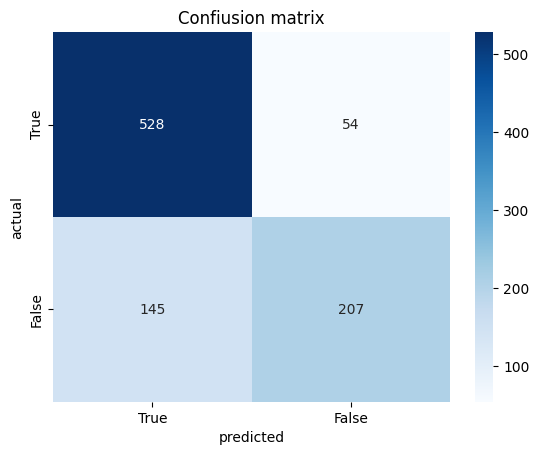

,Metric,Value
0,Accuracy,0.79
1,Precision,0.79
2,Recall,0.59
3,F1-score,0.68


---------------------------------------------------------
USER 2


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3239 - mae: 0.1964 - val_loss: 0.0858 - val_mae: 0.1240
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0676 - mae: 0.1282 - val_loss: 0.0368 - val_mae: 0.1198
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0356 - mae: 0.1226 - val_loss: 0.0302 - val_mae: 0.1128
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0317 - mae: 0.1199 - val_loss: 0.0288 - val_mae: 0.1114
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0312 - mae: 0.1209 - val_loss: 0.0281 - val_mae: 0.1110
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0299 - mae: 0.1183 - val_loss: 0.0274 - val_mae: 0.1079
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0293 - mae: 0.1168 - val_loss: 0.0274 - val_mae: 0.1093
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0285 - mae: 0.1145 - val_loss: 0.0269 - val_mae: 0.1078
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

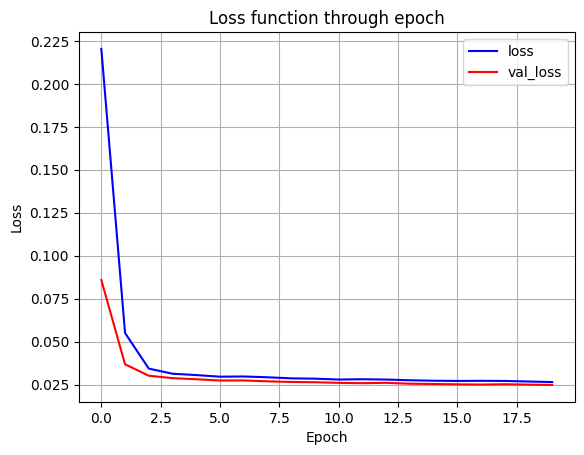

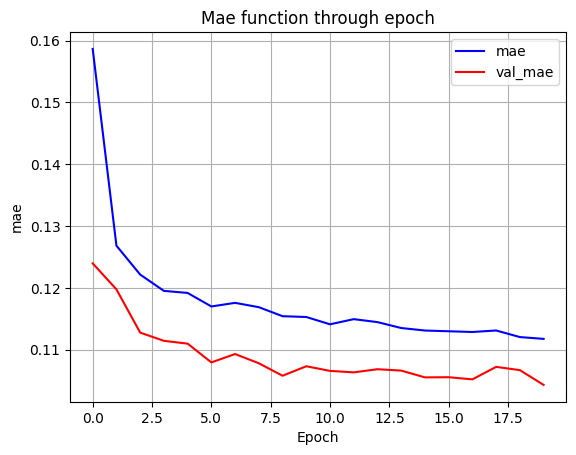

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0251 - mae: 0.1052
MSE:  0.0248248390853405
MAE: 0.10429433733224869


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
The Court RoomClarence Carter,0.690,0.640842,False,False
We Fell In Love While DancingBill Brandon,0.855,0.611023,True,False
Forever My LadyJodeci,0.771,0.688093,True,False
Isn't It Lonely TogetherRobert Knight,0.690,0.640842,False,False
Roll UpWiz Khalifa,0.602,0.499191,False,False
...,...,...,...,...
Shut UpAriana Grande,0.599,0.402171,False,False
Sugar Don't BiteSam Harris,0.975,0.818444,True,True
"Oh, How I Miss You TonightJeanne Black",0.110,0.382149,False,False


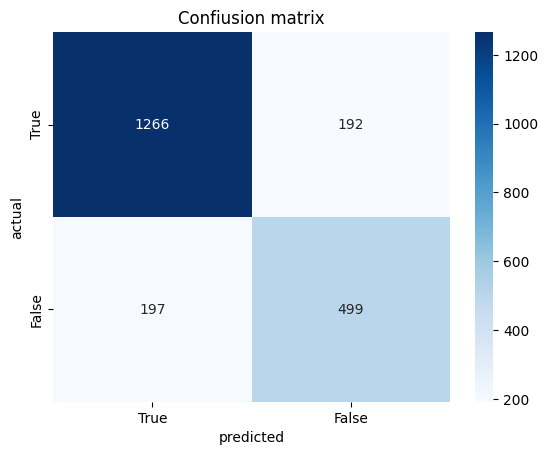

,Metric,Value
0,Accuracy,0.82
1,Precision,0.72
2,Recall,0.72
3,F1-score,0.72


---------------------------------------------------------
USER 3
Epoch 1/20


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3772 - mae: 0.2056 - val_loss: 0.2407 - val_mae: 0.1810
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2136 - mae: 0.1804 - val_loss: 0.1396 - val_mae: 0.1700
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1250 - mae: 0.1702 - val_loss: 0.0860 - val_mae: 0.1596
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0796 - mae: 0.1601 - val_loss: 0.0603 - val_mae: 0.1548
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0583 - mae: 0.1564 - val_loss: 0.0486 - val_mae: 0.1516
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0481 - mae: 0.1516 - val_loss: 0.0429 - val_mae: 0.1490
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0430 - mae: 0.1508 - val_loss: 0.0406 - val_mae: 0.1474
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427 - mae: 0.1526 - val_loss: 0.0393 - val_mae: 0.1468
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0406 - mae: 0.1495 - v

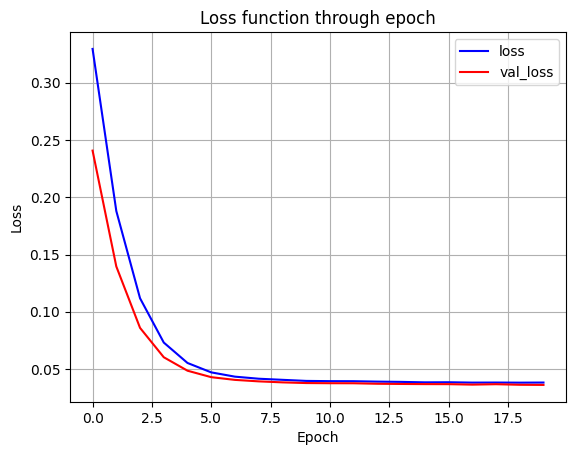

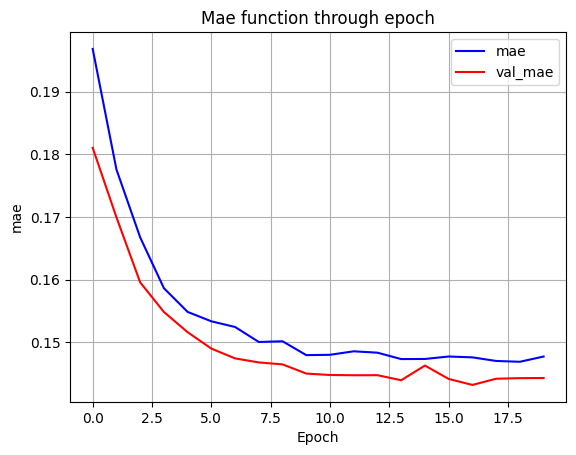

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0374 - mae: 0.1481
MSE:  0.03615562245249748
MAE: 0.14428246021270752


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Can't Let You Out Of My SightChuck Jackson & Maxine Brown,0.4530,0.709625,False,True
It's All Coming Back To Me NowCeline Dion,0.2860,0.265810,False,False
Birthday CakeRihanna Featuring Chris Brown,0.3290,0.709112,False,True
Jack The RipperLink Wray And The Wraymen,0.2920,0.505805,False,False
Little StarThe Elegants,0.6970,0.452384,False,False
...,...,...,...,...
Who Needs PicturesBrad Paisley,0.1520,0.455822,False,False
TwoLil Uzi Vert,0.0371,0.334048,False,False
Hands OnKanye West Featuring Fred Hammond,0.5980,0.419302,False,False


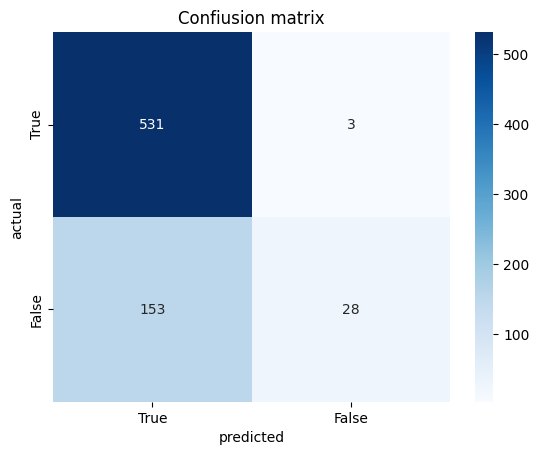

,Metric,Value
0,Accuracy,0.78
1,Precision,0.90
2,Recall,0.15
3,F1-score,0.26


---------------------------------------------------------
USER 4
Epoch 1/20


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4353 - mae: 0.2280 - val_loss: 0.3095 - val_mae: 0.1871
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2873 - mae: 0.1869 - val_loss: 0.2116 - val_mae: 0.1801
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1954 - mae: 0.1778 - val_loss: 0.1473 - val_mae: 0.1766
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1377 - mae: 0.1768 - val_loss: 0.1064 - val_mae: 0.1743
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1006 - mae: 0.1713 - val_loss: 0.0808 - val_mae: 0.1718
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0771 - mae: 0.1672 - val_loss: 0.0649 - val_mae: 0.1681
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0621 - mae: 0.1623 - val_loss: 0.0553 - val_mae: 0.1648
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0546 - mae: 0.1618 - val_loss: 0.0494 - val_mae: 0.1625
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0495 - mae: 0.1608 - va

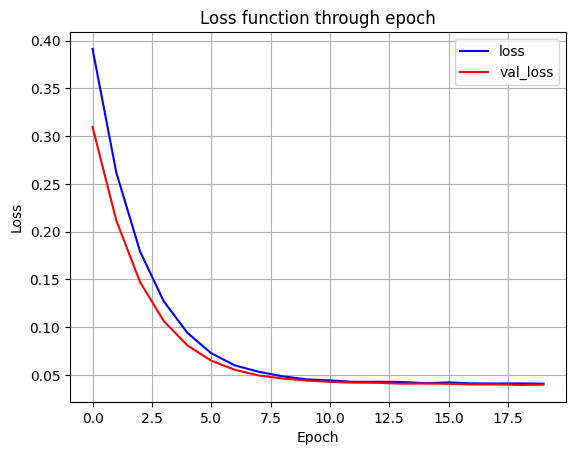

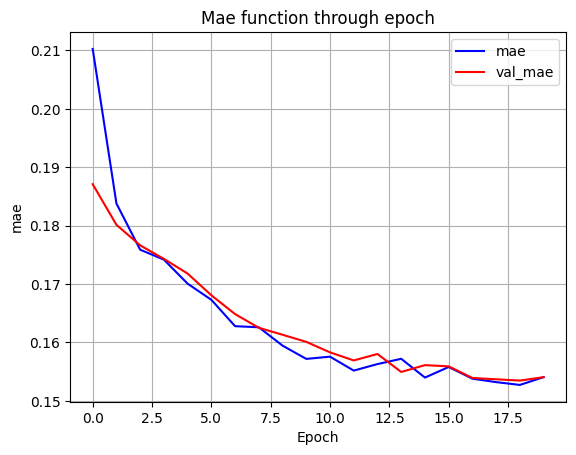

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0405 - mae: 0.1561
MSE:  0.03988601267337799
MAE: 0.15404893457889557


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,0.816,0.596729,True,False
Wish You Were HereAvril Lavigne,0.340,0.545066,False,False
Wichita LinemanGlen Campbell,0.391,0.384278,False,False
PinkAerosmith,0.777,0.496789,True,False
Go Hard Or Go HomeWiz Khalifa & Iggy Azalea,0.386,0.591041,False,False
...,...,...,...,...
Pull Up N WreckBig Sean & Metro Boomin Featuring 21 Savage,0.091,0.397528,False,False
Empire State Of MindGlee Cast,0.719,0.517077,True,False
Impossible Mission (Mission Impossible)Soul Survivors,0.786,0.670409,True,False


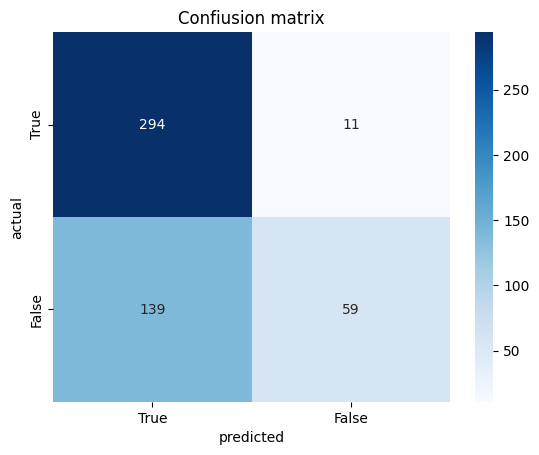

,Metric,Value
0,Accuracy,0.70
1,Precision,0.84
2,Recall,0.30
3,F1-score,0.44


In [92]:
dizio_model_user = {} #in this dizio we store the model for each user
dizio_accuracy = {} #accuracy of the model

# DICTIONARY TO STORE SONG RECOMMENDATION PER USER
reccomandations_songs_per_user={}

#threshold
threshold = 0.7


#loop creation user and model
for i in range(0, len(merge_unique_numain_df['User'].unique())): #i indica lo user   
#for i in range(0,1):

    print('---------------------------------------------------------')
    print(f'USER {i}')

    #select user
    mask_user = merge_unique_numain_df['User'] == i
    #display(mask_user)
    user_i_df = merge_unique_numain_df[mask_user]
    #display(user_i_df) 

    #return train and test
    x_train,y_train,x_test,y_test = return_train_test(user_i_df)

    #-------------------------------------------------------------

    #UPDATE

    #extract the feature and target
    '''x = user_i_df[feature]
    y = user_i_df[target]

    #normalization
    x_scaled = StandardScaler().fit_transform(x)

    #split; serve farlo? non se ne occupa il fit? chiedere
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
    #display(x_train)

    #conversion
    y_train=np.array(y_train)
    y_test=np.array(y_test)'''

    #-------------------------------------------------------------

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #test no function
    '''history_model_user_i = model_user_i.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )'''
    
    #prediction
    y_hat = model_user_i.predict(x_test)

    #plot the metrics of the model
    plot_for_model(history_model_user_i)

    #accuracy
    test_loss, test_mae = model_user_i.evaluate(x_test,y_test,verbose=1)
    print('MSE: ', test_loss)
    print('MAE:', test_mae)

    #reccomandation
    reccomandation_df = reco_function_conf_matrix(y_test, y_hat, threshold)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations:': reccomandation_df} 
    
    #save accuracy 
    dizio_accuracy[f'User{i}'] = {
        'MAE' : mean_absolute_error(y_test, y_hat),
        'MSE' : mean_squared_error(y_test, y_hat)
    }

    

## DISPLAY DICTIONARY ACCURACY

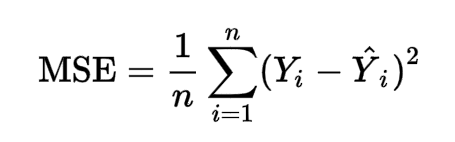

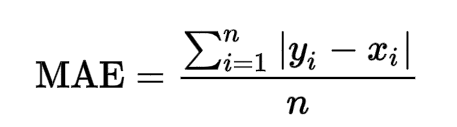

In [93]:
display(dizio_accuracy)

{'User0': {'MAE': 0.14394633814081786, 'MSE': 0.03101934508783204},
 'User1': {'MAE': 0.14116097171500613, 'MSE': 0.029913999444560035},
 'User2': {'MAE': 0.10429433237476933, 'MSE': 0.02096592000635719},
 'User3': {'MAE': 0.14428246478674298, 'MSE': 0.0306429360907648},
 'User4': {'MAE': 0.15404893319298685, 'MSE': 0.03352227608456944}}

A "good" MAE value depends on the context, but in general:  

- **MAE < 0.05** → Excellent model (average error of 5%).  
- **MAE between 0.05 and 0.1** → Good model.  
- **MAE between 0.1 and 0.2** → Acceptable but improvable.  
- **MAE > 0.2** → Low-precision model.  

Our MAE is around **0.1**, it means that, on average, the model is off by **10 percentage points** on the 0-1 rating scale, which might be acceptable in our scenarios.

-----------------------------------------------------------------------------------------------------------------------

***WHY IS THIS MARGIN OF ERROR ACCETABLE ?***

We must consider the nature of the data on which our model is trained.
Since, to determine our users we used an unsupervised algorithm (**kmeans**), with shilhuette 0.49, this means as explained before, that we do not have good homogeneity within the cluster.

So rightly our NN trained on this data will not capture such representative relationships, given that the user himself, as he has been defined, **does not have clear musical tastes**.

**In order to have better results we will have user that lister only particular generes, this allowed us to decrease the errror since we will find a precise patterns in the data.**



**HOW DO CLASSICAL RECOMMENDATION ALGORITHMS BEHAVE IN TERMS OF ERROR ? (in particular the Content based one)**

Recommendation algorithms, including content-based ones, are prone to errors because user preferences evolve over time. An individual may enjoy a certain type of content at one point but later lose interest in similar items. Several factors contribute to this:

* **Changing Preferences** – Users’ tastes are dynamic and can shift over time, making past data less reliable.
* **Context and Mood** – Recommendations may not align with temporary preferences based on mood or situation.
* **Over-Specialization** (Cold Start) – Content-based systems can become too narrow, limiting content diversity and discovery.
* **External Influences** – Trends, reviews, and social factors affect choices, which content-based models struggle to capture.


To address these issues, platforms often combine content-based and collaborative filtering approaches or use adaptive models that update recommendations based on new interactions. Despite improvements, **some level of error is unavoidable, which is why metrics like MAE and RMSE are used to track and refine recommendation accuracy.**



## DISPLAY DF METRICS CONFUSION MATRIX

In [110]:
# PERCHè NON ME LO FA VISUALIZZARE ?
'''display(df_metrics_cm)'''
#dizio_model_user['User0']

'display(df_metrics_cm)'

## DISPLAY DICTIONARY MODEL

In [95]:
#display(dizio_model_user)

## TEST DIZIONARIO MODELLI PER USER

In [96]:
dizio_model_user['User0']['model_user_i'].summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

## CONCLUSION 

First of all we want to point out that several attempts have been made to add layers to make the network deeper, we have also tried to increase the number of neurons and modified the drop out neurons and regularization techniques within the neuron itself to avoid overfitting.

Despite these attempts to reduce the MAE below the 10% threshold, this does not appear to be possible.
Our explanation in this regard can be traced back to the nature and quantity of the data.

It would therefore be useful to test our network with different data, in particular **users with homogeneous tastes**, this allowed us to easy find **'evident patterns'**, that will improve our prediction.


**Aggiungere qualcosa anche relativamente ai risultati che otteniamo dal confusion matrix e quindi dal nostro sistema di raccomandazione, e come la composizione dei diversi utenti influenzano la bonta del reccomandation sysyem**

# SAVE

In [97]:
%store merge_unique_df

Stored 'merge_unique_df' (DataFrame)


In [98]:
%store merge_unique_numain_df

Stored 'merge_unique_numain_df' (DataFrame)


In [99]:
%store dizio_model_user
%store dizio_accuracy

Stored 'dizio_model_user' (dict)
Stored 'dizio_accuracy' (dict)


## TEST WITH OTHER MODEL

In [100]:
from sklearn.svm import SVR

In [101]:
x_tr,y_tr,x_te,y_te=return_train_test(user1_df)

In [102]:
model_svr=SVR()

In [103]:
model_svr.fit(x_tr,y_tr)

SVR()

In [104]:
y_hat_svr=model_svr.predict(x_te)

In [105]:
mean_absolute_error(y_hat_svr,y_te)

0.13091741993521286